In [1]:
# Import dependencies
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import datetime as dt

In [2]:
# Use Pandas to read the SF crime data
sf_crime_data = pd.read_csv("sf_crime_data_2015-2017.csv")
moon_data = pd.read_csv("moon_phases_2015-2017.csv")


In [3]:
# Double check sf crime data
sf_crime_data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,1/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",1.500000e+13
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,2/1/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",1.500000e+13
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,2/1/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",1.500000e+13
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,2/1/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",1.500000e+13
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,1/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",1.500000e+13


In [4]:
# Rename Full Date column
moon_data.rename(columns = {'Full Date':'Date'}, inplace = True)
moon_data.head()

,Year,Day,Month,Date,Percent Illumination,Moon Phase
0,2015,1,1,1/1/2015,84.00%,Waxing gibbous
1,2015,2,1,1/2/2015,91.00%,Waxing gibbous
2,2015,3,1,1/3/2015,96.00%,Waxing gibbous
3,2015,4,1,1/4/2015,99.00%,Waxing gibbous
4,2015,5,1,1/5/2015,100.00%,Full Moon


In [5]:
# Combine the data into a single dataset
sf_data_comp = pd.merge(sf_crime_data, moon_data, how="left", on = 'Date')
sf_data_comp.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Year,Day,Month,Percent Illumination,Moon Phase
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,1/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",1.500000e+13,2015,19,1,3.00%,Waning crescent
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,2/1/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",1.500000e+13,2015,1,2,93.00%,Waxing gibbous
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,2/1/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",1.500000e+13,2015,1,2,93.00%,Waxing gibbous
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,2/1/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",1.500000e+13,2015,1,2,93.00%,Waxing gibbous
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,1/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",1.500000e+13,2015,27,1,51.00%,First Quarter


In [6]:
# List of column names in dataframe
sf_data_comp.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId',
       'Year', 'Day', 'Month', 'Percent Illumination', 'Moon Phase'],
      dtype='object')

In [7]:
# Create new data frame
sf_data_clean = sf_data_comp

# Remove unwanted columns
sf_data_clean.drop(labels=['IncidntNum', 'Descript', 'DayOfWeek', 'Resolution', 'X', 'Y', 'PdId', 'Year', 'Day', 'Month'], axis=1, inplace=True)
sf_data_clean

,Category,Date,Time,PdDistrict,Address,Location,Percent Illumination,Moon Phase
0,NON-CRIMINAL,1/19/2015,14:00,MISSION,18TH ST / VALENCIA ST,"(37.7617007179518, -122.42158168137)",3.00%,Waning crescent
1,ROBBERY,2/1/2015,15:45,TENDERLOIN,300 Block of LEAVENWORTH ST,"(37.7841907151119, -122.414406029855)",93.00%,Waxing gibbous
2,ASSAULT,2/1/2015,15:45,TENDERLOIN,300 Block of LEAVENWORTH ST,"(37.7841907151119, -122.414406029855)",93.00%,Waxing gibbous
3,SECONDARY CODES,2/1/2015,15:45,TENDERLOIN,300 Block of LEAVENWORTH ST,"(37.7841907151119, -122.414406029855)",93.00%,Waxing gibbous
4,VANDALISM,1/27/2015,19:00,NORTHERN,LOMBARD ST / LAGUNA ST,"(37.8004687042875, -122.431118543788)",51.00%,First Quarter
5,NON-CRIMINAL,2/1/2015,16:21,RICHMOND,400 Block of LOCUST ST,"(37.7870853907529, -122.451781767894)",93.00%,Waxing gibbous
6,SECONDARY CODES,1/31/2015,21:00,BAYVIEW,700 Block of KIRKWOOD AV,"(37.729203356539, -122.374019331833)",87.00%,Waxing gibbous
7,VANDALISM,1/31/2015,21:00,BAYVIEW,700 Block of KIRKWOOD AV,"(37.729203356539, -122.374019331833)",87.00%,Waxing gibbous
8,BURGLARY,1/31/2015,16:09,CENTRAL,200 Block of STOCKTON ST,"(37.7878092959561, -122.40656817787)",87.00%,Waxing gibbous
9,LARCENY/THEFT,1/31/2015,17:00,CENTRAL,800 Block of GEARY ST,"(37.7862578545865, -122.417295322526)",87.00%,Waxing gibbous


In [8]:
# Change date formatting
sf_data_clean['Date'] = sf_data_clean['Date'].apply(lambda x : dt.datetime.strptime(x, '%m/%d/%Y'))
sf_data_clean

,Category,Date,Time,PdDistrict,Address,Location,Percent Illumination,Moon Phase
0,NON-CRIMINAL,2015-01-19,14:00,MISSION,18TH ST / VALENCIA ST,"(37.7617007179518, -122.42158168137)",3.00%,Waning crescent
1,ROBBERY,2015-02-01,15:45,TENDERLOIN,300 Block of LEAVENWORTH ST,"(37.7841907151119, -122.414406029855)",93.00%,Waxing gibbous
2,ASSAULT,2015-02-01,15:45,TENDERLOIN,300 Block of LEAVENWORTH ST,"(37.7841907151119, -122.414406029855)",93.00%,Waxing gibbous
3,SECONDARY CODES,2015-02-01,15:45,TENDERLOIN,300 Block of LEAVENWORTH ST,"(37.7841907151119, -122.414406029855)",93.00%,Waxing gibbous
4,VANDALISM,2015-01-27,19:00,NORTHERN,LOMBARD ST / LAGUNA ST,"(37.8004687042875, -122.431118543788)",51.00%,First Quarter
5,NON-CRIMINAL,2015-02-01,16:21,RICHMOND,400 Block of LOCUST ST,"(37.7870853907529, -122.451781767894)",93.00%,Waxing gibbous
6,SECONDARY CODES,2015-01-31,21:00,BAYVIEW,700 Block of KIRKWOOD AV,"(37.729203356539, -122.374019331833)",87.00%,Waxing gibbous
7,VANDALISM,2015-01-31,21:00,BAYVIEW,700 Block of KIRKWOOD AV,"(37.729203356539, -122.374019331833)",87.00%,Waxing gibbous
8,BURGLARY,2015-01-31,16:09,CENTRAL,200 Block of STOCKTON ST,"(37.7878092959561, -122.40656817787)",87.00%,Waxing gibbous
9,LARCENY/THEFT,2015-01-31,17:00,CENTRAL,800 Block of GEARY ST,"(37.7862578545865, -122.417295322526)",87.00%,Waxing gibbous


In [9]:
# Create an overview table that summarizes necessary data: 

# Total crime by date
sf_crime_total = pd.DataFrame(sf_data_clean.Date.value_counts())

# Rename Date column to Total Crimes
sf_crime_total_rename = sf_crime_total.rename(columns={'Date': 'Total Crimes'})

# Add index title for Total Crime
sf_crime_total_rename.index.name = 'Date'

# Merge crime counts with previous total data frame
sf_totcrime = sf_data_clean.merge(sf_crime_total_rename, how='outer', on='Date').drop(['Time', 'PdDistrict', 'Address', 'Category', 'Location', 'Moon Phase'], axis=1)

# Remove duplicate dates/condense
sf_totcrime_rm = sf_totcrime.drop_duplicates()

# Sort data frame by date
sf_sum_bydate = sf_totcrime_rm.sort_values(by='Date')

# Reset index values
sf_summary = sf_sum_bydate.reset_index(drop=True)

# Print the data
sf_summary



,Date,Percent Illumination,Total Crimes
0,2015-01-01,84.00%,553
1,2015-01-02,91.00%,433
2,2015-01-03,96.00%,444
3,2015-01-04,99.00%,335
4,2015-01-05,100.00%,459
5,2015-01-06,99.00%,417
6,2015-01-07,96.00%,397
7,2015-01-08,91.00%,394
8,2015-01-09,85.00%,509
9,2015-01-10,78.00%,424


In [10]:
# Changing the Percent Illumination column data type to a float for binning below
sf_summary['Percent Illumination'] = sf_summary['Percent Illumination'].str.rstrip('%').astype('float')

In [17]:
# Create percent illumination bins
bins = [0, 3, 10, 21.5, 35.5, 51, 66, 79, 90, 97, 100]
group_name = ['0-3%', '4-10%', '11-21%', 
              '22-35%', '36-50%', '51-65%', 
              '66-78%', '79-89%', '90-96%', '97-100%']
sf_summary['% Illumination'] = pd.cut(sf_summary['Percent Illumination'], 
                                      bins, 
                                      labels = group_name, 
                                      include_lowest=True)

# Group the merged data by school spending
by_illumination = sf_summary.groupby('% Illumination')

# Calculate average crime
avg_crime = by_illumination['Total Crimes'].mean()

# Store illumination bins in a dataframe            
sf_summary_new = pd.DataFrame({'Average Crime': avg_crime})

# Print new summary data frame
sf_summary_new

,Average Crime
% Illumination,
0-3%,422.554688
4-10%,423.117021
11-21%,419.785047
22-35%,419.137615
36-50%,421.974359
51-65%,420.214953
66-78%,423.773585
79-89%,426.963964
90-96%,419.046296


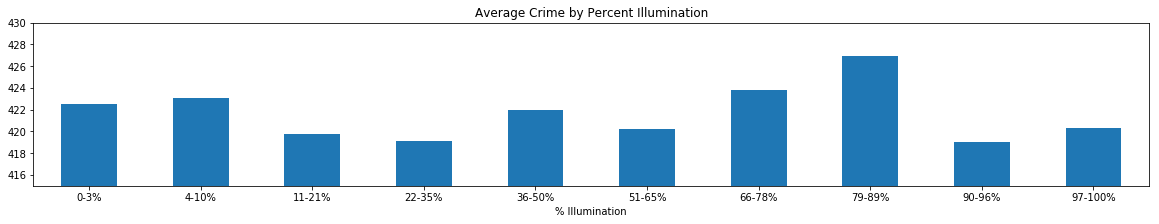

In [37]:
# Use DataFrame.plot() in order to create a bar chart of the data
sf_summary_new.plot(kind="bar", figsize=(20,3), title='Average Crime by Percent Illumination', legend=False, 
                    ylim=(415,430), rot=0)

# Save plot
plt.savefig("sf_avgcrime_percillum.png")

# Show plot
plt.show()

In [38]:
# Save summary data to csv
sf_summary.to_csv("sf_summary.csv")